<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/edo/blob/main/banco_ejemplos/4_laplace/3_sol_sist_laplace/2_sistema_laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/edo/blob/main/banco_ejemplos/4_laplace/3_sol_sist_laplace/2_sistema_laplace.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Ejemplo 2 sobre sistemas con Laplace

Resuelva el sistema (1)  


cuando $k_{1}= 3$, $k_{2} =  2$, $m_{1} = 1$, $m_{2} = 1$ y  

$$ x (0) = 0, , x'(0) = 1, y(0) = 1, y'(0) = 0 $$


\begin{align*}
x''  & =  -5x + 2y \\ 
y'' & = 2x - 2y  
\end{align*}


$$ x(0) = 0, \ \ x'(0) = 1 $$

$$ y(0) = 1, \ \ \ y'(0) = 0  $$

Página 315 del Zill, sección 7.6. 

## [Video apoyo](https://www.youtube.com/watch?v=9HlJOG1oVPw) 

## Solución analítica con verificación de cada paso utilizando Sympy

### Metodología de solución

1. Aplicar transformada de laplace para convertir el sistema en un sistema algebraico
2. Resolver el sistema algebraico con Gauss Jordan para obtener las soluciones $X(s)$ y $Y(s)$.
3. Aplica transformada inversa de Laplace para obtener $x(t)$ y $y(t)$. 

$$ (s^{2}X - sx(0) - x'(0))  = -5X + 2Y  $$

$$ s^{2}Y - sy(0) - y'(0) = 2X - 2Y  $$

Sustituyamos los valores de las condiciones iniciales: 

$$ s^{2}X  - 1  = -5X + 2Y  $$

$$ s^{2}Y - s  = 2X - 2Y  $$

In [33]:
from sympy import *
init_printing()  

In [2]:
t = symbols('t', nonegative = True) # definir las variables independientes del problema
s = symbols('s', positive = True) 

In [3]:
x,X,y,Y = symbols('x,X,y,Y') # Definimos las variables dependientes

In [4]:
x_sol,y_sol = symbols('x_sol,y_sol') 
# Definimos las variables para denotar las funciónes solución del sistema original

In [5]:
x_sol = Function('x_sol')(t) # definimos de que variable independiente son función x_sol y y_sol
y_sol = Function('y_sol')(t)

In [6]:
x = Function('x')(t) # Definimos a x y a y como funciones del tiempo
y = Function('y')(t)

In [7]:
X = Function('X')(s) # Defnimos a X y a Y como funciones de s
Y = Function('Y')(s) 

In [8]:
def L(f):
    return laplace_transform(f,t,s, noconds = True)  

def inv_L(F):
    return inverse_laplace_transform(F,s,t, noconds = True)  

def L_diff(f, f0, fp0, fpp0 = 0 , n = 1): # esta función es para calcular transformadas de derivadas
    """
    input:
    f es una variable simbólica de sympy que representa a la función f(t) a la que se quiere calcular 
      la transformada de alguna de sus derivadas. 
    
    n puede asumir los valores de 0,1,2,3 y representa el orden de la derivada de la función f(t)
    """
    F = str(f).upper().split('(')[0] 
    F = symbols(F) 
    F = Function(F)(s) 
    if n == 0:
        L = F
    elif n == 1:
        L = s*F - f0
    elif n == 2:
        L = s**2*F - s*f0 - fp0
    elif n == 3:
        L = s**3*F - s**2*f0,-s*fp0 - fpp0
    return L 

In [9]:

#\begin{align*}
#x''  & =  -5x + 2y \\ 
#y'' & = 2x - 2y  
#\end{align*}

eq1 = Eq( diff(x,t,2) , -5*x + 2*y )   # primera ecuación 
eq2 = Eq( diff(y,t,2) , 2*x - 2*y  )   # segunda ecuación 

In [10]:
display(eq1,eq2) 

Eq(Derivative(x(t), (t, 2)), -5*x(t) + 2*y(t))

Eq(Derivative(y(t), (t, 2)), 2*x(t) - 2*y(t))

In [11]:
#$$ x(0) = 0, \ \ x'(0) = 1 $$

#$$ y(0) = 1, \ \ \ y'(0) = 0  $$

x0 = 0
xp0 = 1
y0  = 1
yp0 = 0

## Cálculo del sistema de ecuaciones algebraico 

In [12]:
#\begin{align*}
#x''  & =  -5x + 2y \\ 
#y'' & = 2x - 2y  
#\end{align*}

eq1_l = Eq( L_diff(x, x0, xp0, n = 2), - 5*L_diff(x, x0, xp0, n = 0) + 2*L_diff(y,y0,yp0,n = 0) )
eq2_l = Eq( L_diff(y, y0, yp0, n = 2), -2*L_diff(y, y0, yp0, n = 0) + 2*L_diff(x, x0, xp0,n = 0) )

In [13]:
display(eq1_l, eq2_l) 

Eq(s**2*X(s) - 1, -5*X(s) + 2*Y(s))

Eq(s**2*Y(s) - s, 2*X(s) - 2*Y(s))

In [14]:
sol_alg = solve([eq1_l, eq2_l], (X, Y))   

In [15]:
sol_alg 

{X(s): (s**2 + 2*s + 2)/(s**4 + 7*s**2 + 6),
 Y(s): (s**3 + 5*s + 2)/(s**4 + 7*s**2 + 6)}

In [16]:
sol_alg[X] 

(s**2 + 2*s + 2)/(s**4 + 7*s**2 + 6)

In [17]:
X_alg = sol_alg[X].apart() 
X_alg 

-2*(s - 2)/(5*(s**2 + 6)) + (2*s + 1)/(5*(s**2 + 1))

$$ X(s) = -\frac{2}{5} \cdot \frac{s-2}{s^{2} + 6} + \frac{1}{5} \cdot \frac{2s + 1}{s^{2} + 1} $$

In [18]:
X1 = (s-2)/(s**2+6)
X2 = (2*s + 1)/(s**2 + 1)

In [ ]:
x_sol = (-2/5)*inv_L(X1) + (1/5)*inv_L(X2)  

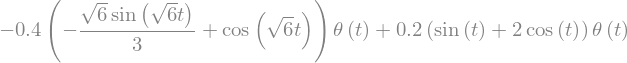

In [38]:
x_sol = sympify(x_sol )
x_sol 

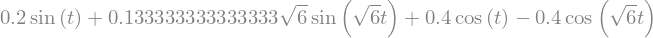

In [34]:
x_sol = x_sol.subs({Heaviside(t):1}) # para quitar el factor theta(t) (Función de Heaviside) 
x_sol 

In [21]:
Y_alg = sol_alg[Y].apart() 
Y_alg 

(s - 2)/(5*(s**2 + 6)) + 2*(2*s + 1)/(5*(s**2 + 1))

In [22]:
Y1 = (s-2)/(s**2+6)
Y2 = (2*s + 1)/(s**2 + 1)

In [23]:
y_sol = (1/5)*inv_L(Y1) + (2/5)*inv_L(Y2)  
y_sol 

0.2*(-sqrt(6)*sin(sqrt(6)*t)/3 + cos(sqrt(6)*t))*Heaviside(t) + 0.4*(sin(t) + 2*cos(t))*Heaviside(t)

In [24]:
y_sol = y_sol.subs({Heaviside(t):1}) # para quitar el factor theta(t) (Función de Heaviside) 
y_sol 

0.4*sin(t) - 0.0666666666666667*sqrt(6)*sin(sqrt(6)*t) + 0.8*cos(t) + 0.2*cos(sqrt(6)*t)

$$ Y = \frac{s^{3} + 5s + 2}{s^{4} + 7s^{2} + 6} = \frac{As+B}{s^{2} + 1} + \frac{Cs+D}{s^{2} + 6} $$

Esta descomposición es la menos usual. 

Recuerde que $s^{4} + 7s^{2} + 6$ es un trinomio de la forma $s^{2n} + bs^{n} + c$:

$$ s^{4} + 7s^{2} + 6 = (s^{2} + 6)(s^{2} + 1) $$


## Verificación con sympy 

In [25]:
eq1.subs({x:x_sol, y:y_sol}).simplify().evalf()  

Eq(0.2*sin(t) + 1.95959179422654*sin(sqrt(6)*t) + 0.4*cos(t) - 2.4*cos(sqrt(6)*t), 0.2*sin(t) + 1.95959179422654*sin(sqrt(6)*t) + 0.4*cos(t) - 2.4*cos(sqrt(6)*t))

Como obtuvimos una identidad en la variable $t$, podemos decir que las funciones $x(t)$ y $y(t)$ efectivamente satisfacen la primera ecuación del sistema. 

In [26]:
eq2.subs({x:x_sol, y:y_sol}).simplify() 

True

Como obtuvimos el booleano `True`, podemos decir que las funciones $x(t)$ y $y(t)$ efectivamente satisfacen la segunda ecuación del sistema. 

In [27]:
x_sol.subs({t:0}) == x0

True

In [28]:
diff(x_sol).subs({t:0}) == xp0

True

In [29]:
y_sol.subs({t:0}) == y0

True

In [30]:
diff(y_sol).subs({t:0}) == yp0

True

### Conculsion: Las funciones $x(t)$ y $y(t)$ encontradas satisfacen las ecuaciones y las condiciones iniciales que definen al PVI dado. 

## Graficación de las funciones solución

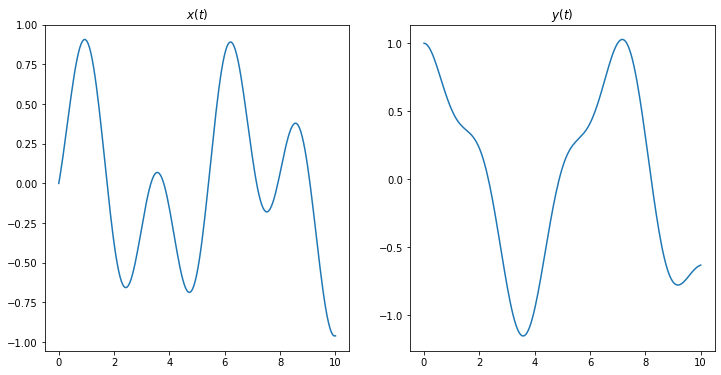

In [48]:
import numpy as np 
import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

t_ = np.linspace(0,10,200)

x_lam = lambdify(t,x_sol) 
y_lam = lambdify(t,y_sol)   

x_numpy = x_lam(t_)
y_numpy = y_lam(t_)


ax1.plot(t_,x_numpy)
ax1.set(title = '$x(t)$')

ax2.plot(t_,y_numpy)
ax2.set(title = '$y(t)$')

plt.savefig('ejemplo_3_sol_sistema_factor_cuadratico.jpg')

plt.show() 

## Funciones de Python utilizadas

* El método `.split()` de Python. 

## Fórmulas a utilizar

$$L^{-1} \left\{ \frac{k}{s^{2} + k^{2}} \right\} = \sin(kt)$$


$$ L^{-1} \left\{  \frac{1}{s^{2}} \right\} = t $$

## Referentes  

* Zill 